**Image Augmentation**

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_data = ImageDataGenerator(rescale=1./255)

In [ ]:
xtest=test_data.flow_from_directory('/content/Flowers-Dataset (1).zip',
                                         target_size=(76,76),
                                         class_mode='categorical',
                                         batch_size=100)


In [ ]:
xtrain=train_data.flow_from_directory('/content/Flowers-Dataset (1).zip',target_size=(76,76), class_mode='categorical',batch_size=100)

**Create a model**

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
model = Sequential()

**Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)**

In [16]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten())
model.add(Dense(300,activation='relu')) 
model.add(Dense(150,activation='relu')) 
model.add(Dense(4,activation='softmax'))

**Compile The Model**

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**Fit The Model**

In [ ]:
model.fit_generator(xtrain,steps_per_epoch= len(xtrain),epochs= 10,validation_data=xtest,validation_steps= len(xtest))

**Save tha Model**

In [24]:
model.save('flower.h5')

**Test The Model**

In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np

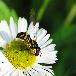

In [31]:
img=image.load_img('/content/5547758_eea9edfd54_n.jpg',target_size=(76,76))
img

In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x= np.expand_dims(x,axis=0)
x

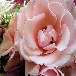

In [36]:
img=image.load_img('/content/12240303_80d87f77a3_n.jpg',target_size=(76,76))
img

In [ ]:
x=image.img_to_array(img)
x
x=np.expand_dims(x,axis=0)
x